In [34]:
import pyfolio as pf
import pandas as pd

# Load from pickle (preserves positions/transactions as proper objects)
results = pd.read_pickle('./backtest_results/my_custom_results.pkl')

results = pd.read_pickle('./backtest_results/my_custom_results-LSZR-entval-ml-15-MLforcast-180-90-10-mlwf-16-resume-2012.pkl')
# Now extract will workt

results = pd.read_pickle('./backtest_results/my_custom_results-LSZR-entval-ml-15-MLforcast-180-90-10-mlwf-16-resume-rs-estrank-10-2012-t.pkl')
returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(results)

# Extract benchmark returns from results
#spy_returns = results['benchmark_period_return'].pct_change().dropna()

In [35]:
# pf.create_full_tear_sheet(
#         returns,
#         positions=positions,
#         transactions=transactions,
#       #  benchmark_rets=spy_returns,
#         live_start_date=None,
#         round_trips=False,
#         estimate_intraday=False,
#     )

In [36]:
results.columns

Index(['period_open', 'period_close', 'shorts_count', 'long_value',
       'short_value', 'returns', 'long_exposure', 'pnl', 'starting_value',
       'capital_used', 'short_exposure', 'orders', 'transactions', 'positions',
       'gross_leverage', 'starting_exposure', 'ending_exposure',
       'net_leverage', 'ending_value', 'starting_cash', 'ending_cash',
       'portfolio_value', 'longs_count', 'algorithm_period_return',
       'benchmark_period_return', 'benchmark_volatility', 'sortino', 'alpha',
       'beta', 'sharpe', 'max_drawdown', 'max_leverage', 'algo_volatility',
       'excess_return', 'treasury_period_return', 'trading_days',
       'period_label', 'backtest_name', 'algo_file'],
      dtype='object')

In [37]:
returns.resample("A").apply(lambda x: ((x + 1).cumprod() - 1).iloc[-1]).to_frame().style.format({'returns':"{:.2%}"})

,returns
2012-12-31 00:00:00+00:00,32.58%
2013-12-31 00:00:00+00:00,83.23%
2014-12-31 00:00:00+00:00,47.71%
2015-12-31 00:00:00+00:00,15.56%
2016-12-31 00:00:00+00:00,25.84%
2017-12-31 00:00:00+00:00,96.99%
2018-12-31 00:00:00+00:00,28.11%
2019-12-31 00:00:00+00:00,68.36%
2020-12-31 00:00:00+00:00,161.44%
2021-12-31 00:00:00+00:00,95.81%


In [38]:
# 2012-12-31 00:00:00+00:00	26.34%
# 2013-12-31 00:00:00+00:00	80.07%
# 2014-12-31 00:00:00+00:00	45.99%
# 2015-12-31 00:00:00+00:00	16.73%
# 2016-12-31 00:00:00+00:00	23.35%
# 2017-12-31 00:00:00+00:00	83.59%
# 2018-12-31 00:00:00+00:00	25.30%
# 2019-12-31 00:00:00+00:00	54.92%
# 2020-12-31 00:00:00+00:00	164.63%
# 2021-12-31 00:00:00+00:00	93.10%
# 2022-12-31 00:00:00+00:00	41.97%
# 2023-12-31 00:00:00+00:00	50.64%
# 2024-12-31 00:00:00+00:00	63.07%
# 2025-12-31 00:00:00+00:00	70.57%


In [39]:
# 2021-12-31 00:00:00+00:00	91.25%
# 2022-12-31 00:00:00+00:00	41.96%
# 2023-12-31 00:00:00+00:00	50.57%
# 2024-12-31 00:00:00+00:00	63.02%
# 2025-12-31 00:00:00+00:00	70.55%


In [40]:
returns.resample("Q").apply(lambda x: ((x + 1).cumprod() - 1).iloc[-1]).to_frame().style.format({'returns':"{:.2%}"})

,returns
2012-03-31 00:00:00+00:00,25.83%
2012-06-30 00:00:00+00:00,-8.91%
2012-09-30 00:00:00+00:00,7.83%
2012-12-31 00:00:00+00:00,7.28%
2013-03-31 00:00:00+00:00,17.82%
2013-06-30 00:00:00+00:00,7.14%
2013-09-30 00:00:00+00:00,15.59%
2013-12-31 00:00:00+00:00,25.58%
2014-03-31 00:00:00+00:00,13.59%
2014-06-30 00:00:00+00:00,11.14%


In [41]:
# 2021-03-31 00:00:00+00:00	13.91%
# 2021-06-30 00:00:00+00:00	14.60%
# 2021-09-30 00:00:00+00:00	16.40%
# 2021-12-31 00:00:00+00:00	25.86%
# 2022-03-31 00:00:00+00:00	12.91%
# 2022-06-30 00:00:00+00:00	-0.44%
# 2022-09-30 00:00:00+00:00	9.12%
# 2022-12-31 00:00:00+00:00	15.73%
# 2023-03-31 00:00:00+00:00	11.86%
# 2023-06-30 00:00:00+00:00	15.95%
# 2023-09-30 00:00:00+00:00	2.13%
# 2023-12-31 00:00:00+00:00	13.67%
# 2024-03-31 00:00:00+00:00	26.90%
# 2024-06-30 00:00:00+00:00	8.77%
# 2024-09-30 00:00:00+00:00	15.00%
# 2024-12-31 00:00:00+00:00	2.71%
# 2025-03-31 00:00:00+00:00	5.06%
# 2025-06-30 00:00:00+00:00	18.44%
# 2025-09-30 00:00:00+00:00	9.23%
# 2025-12-31 00:00:00+00:00	25.49%


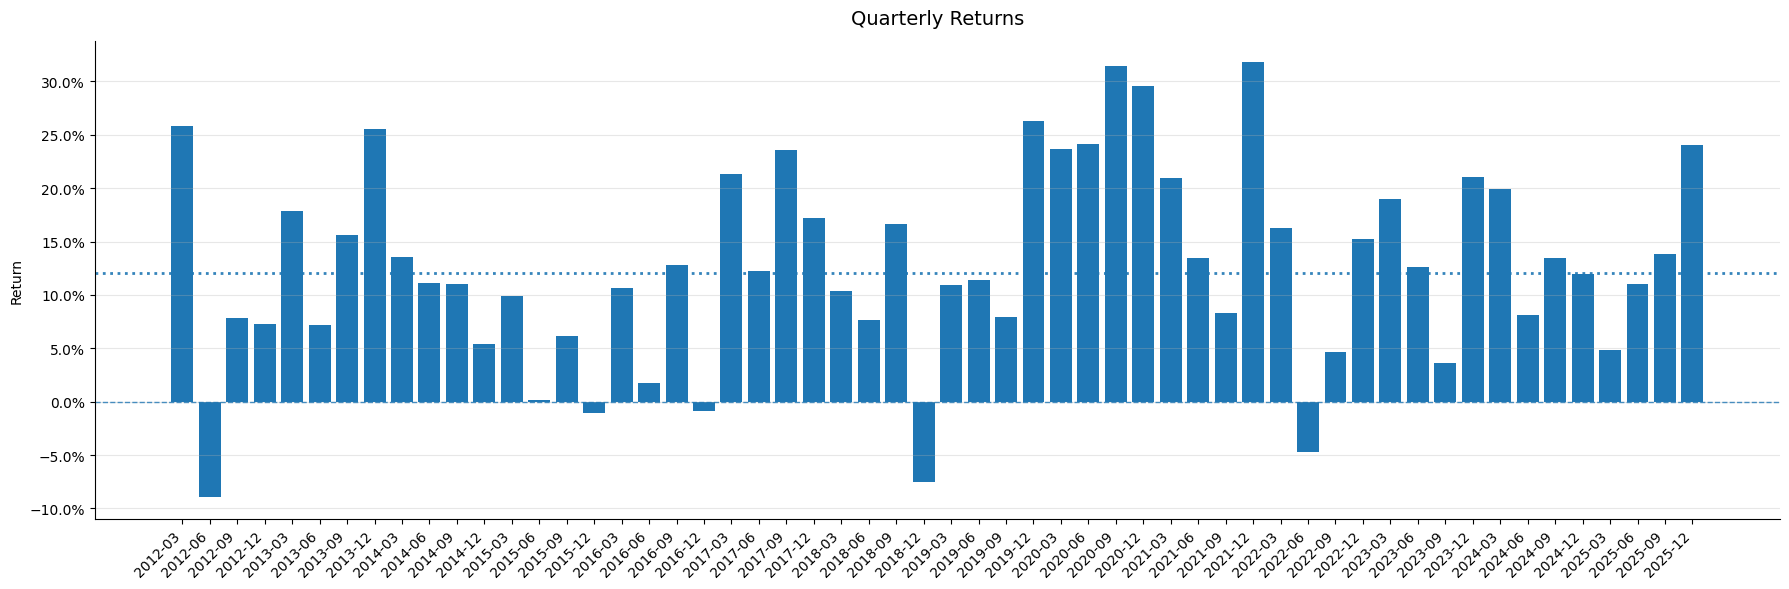

In [42]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

# --- Create quarterly returns ---
df_rt = (
    returns
    .resample("Q")
    .apply(lambda x: ((x + 1).cumprod() - 1).iloc[-1])
    .to_frame(name="Quarterly Return")
)

df_rt.index = df_rt.index.strftime("%Y-%m")

# --- Figure / Axes (PyFolio style) ---
fig, ax = plt.subplots(figsize=(18, 6))

# Bars
ax.bar(
    df_rt.index,
    df_rt["Quarterly Return"],
    width=0.8
)

# Zero line (PyFolio standard)
ax.axhline(0, linestyle="--", linewidth=1, alpha=0.8)

# Median line (optional but useful)
ax.axhline(
    df_rt["Quarterly Return"].median(),
    linestyle=":",
    linewidth=2,
    alpha=0.9
)

# Formatting
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
ax.set_xlabel("")
ax.set_ylabel("Return")

# Grid (horizontal only)
ax.grid(axis="y", alpha=0.3)
ax.grid(axis="x", visible=False)

# Ticks
plt.xticks(rotation=45, ha="right")

# Remove spines (PyFolio aesthetic)
for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)

# Title
ax.set_title(
    "Quarterly Returns",
    fontsize=14,
    pad=12
)

plt.tight_layout()
plt.show()


In [43]:
# Your existing code
quarterly_returns = returns.resample("Q").apply(lambda x: ((x + 1).cumprod() - 1).iloc[-1]).to_frame(name='returns')

# Ensure that the index is a DateTimeIndex
quarterly_returns.index = pd.to_datetime(quarterly_returns.index)

# Filter for Q4 and format the result
styled_result_Q1 = quarterly_returns[(quarterly_returns.index.month >= 1) & (quarterly_returns.index.month <= 3)].style.format({'returns':"{:.2%}"})
styled_result_Q2 = quarterly_returns[(quarterly_returns.index.month >= 4) & (quarterly_returns.index.month <= 6)].style.format({'returns':"{:.2%}"})
styled_result_Q3 = quarterly_returns[(quarterly_returns.index.month >= 7) & (quarterly_returns.index.month <= 9)].style.format({'returns':"{:.2%}"})
styled_result_Q4 = quarterly_returns[(quarterly_returns.index.month >= 10) & (quarterly_returns.index.month <= 12)].style.format({'returns':"{:.2%}"})

styled_result_Q1_ME = quarterly_returns[(quarterly_returns.index.month >= 1) & (quarterly_returns.index.month <= 3)].median()
styled_result_Q2_ME = quarterly_returns[(quarterly_returns.index.month >= 4) & (quarterly_returns.index.month <= 6)].median() 
styled_result_Q3_ME = quarterly_returns[(quarterly_returns.index.month >= 7) & (quarterly_returns.index.month <= 9)].median() 
styled_result_Q4_ME = quarterly_returns[(quarterly_returns.index.month >= 10) & (quarterly_returns.index.month <= 12)].median() 


In [44]:
for val in styled_result_Q1_ME:
    print(f"Q1 {val:.2f}%")
for val in styled_result_Q2_ME:
    print(f"Q2 {val:.2f}%")
for val in styled_result_Q3_ME:
    print(f"Q3 {val:.2f}%")
for val in styled_result_Q4_ME:
    print(f"Q4 {val:.2f}%")

Q1 0.17%
Q2 0.10%
Q3 0.12%
Q4 0.16%


In [45]:
styled_result_Q1

,returns
2012-03-31 00:00:00+00:00,25.83%
2013-03-31 00:00:00+00:00,17.82%
2014-03-31 00:00:00+00:00,13.59%
2015-03-31 00:00:00+00:00,9.94%
2016-03-31 00:00:00+00:00,10.66%
2017-03-31 00:00:00+00:00,21.29%
2018-03-31 00:00:00+00:00,10.39%
2019-03-31 00:00:00+00:00,10.92%
2020-03-31 00:00:00+00:00,23.71%
2021-03-31 00:00:00+00:00,20.92%


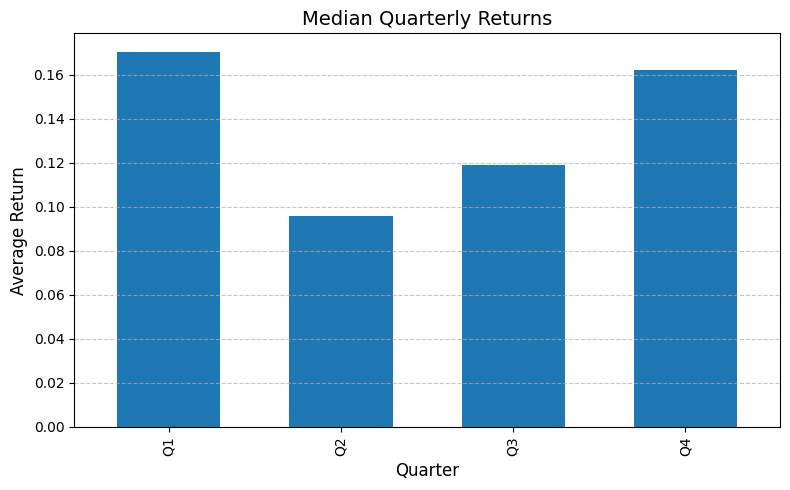

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Resample to quarterly returns
quarterly_returns = returns.resample("Q").apply(lambda x: ((x + 1).cumprod() - 1).iloc[-1])

# Add a 'quarter' column to extract the quarter of each return
quarterly_returns.index = pd.to_datetime(quarterly_returns.index)  # Ensure datetime index
quarterly_returns = quarterly_returns.to_frame(name='returns')
quarterly_returns['quarter'] = quarterly_returns.index.quarter

# Group by quarter and calculate average returns
average_quarterly_returns = quarterly_returns.groupby('quarter')['returns'].median()

# Plot the results as a histogram
average_quarterly_returns.plot(kind='bar', figsize=(8, 5), width=0.6)

# Customize the plot
plt.title('Median Quarterly Returns', fontsize=14)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Average Return', fontsize=12)
plt.xticks(ticks=range(4), labels=['Q1', 'Q2', 'Q3', 'Q4'], fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

In [47]:
returns.resample("M").apply(lambda x: ((x + 1).cumprod() - 1).iloc[-1]).to_frame().style.format({'returns':"{:.2%}"})

,returns
2012-01-31 00:00:00+00:00,8.06%
2012-02-29 00:00:00+00:00,10.92%
2012-03-31 00:00:00+00:00,4.98%
2012-04-30 00:00:00+00:00,-3.15%
2012-05-31 00:00:00+00:00,-7.73%
2012-06-30 00:00:00+00:00,1.93%
2012-07-31 00:00:00+00:00,-2.17%
2012-08-31 00:00:00+00:00,4.01%
2012-09-30 00:00:00+00:00,5.97%
2012-10-31 00:00:00+00:00,0.05%


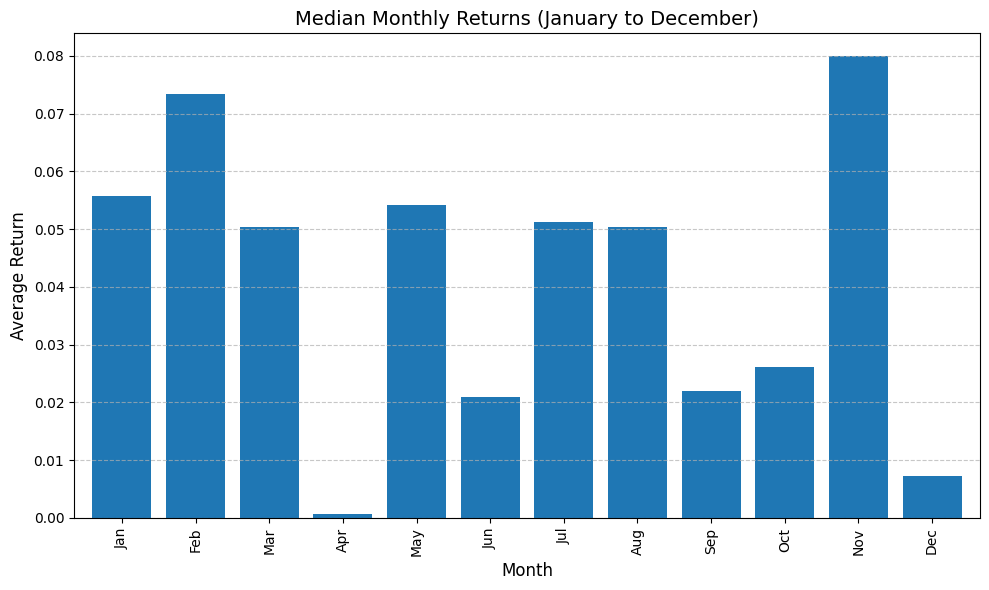

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Resample to monthly returns
monthly_returns = returns.resample("M").apply(lambda x: ((x + 1).cumprod() - 1).iloc[-1])

# Add a 'month' column to extract the month of each return
monthly_returns.index = pd.to_datetime(monthly_returns.index)  # Ensure datetime index
monthly_returns = monthly_returns.to_frame(name='returns')
monthly_returns['month'] = monthly_returns.index.month

# Group by month and calculate average returns
average_monthly_returns = monthly_returns.groupby('month')['returns'].median()

# Plot the results as a histogram
average_monthly_returns.plot(kind='bar', figsize=(10, 6), width=0.8)

# Customize the plot
plt.title('Median Monthly Returns (January to December)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Return', fontsize=12)
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                     'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


/usr/local/lib/python3.11/site-packages/pyfolio/plotting.py:670: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '59.88%' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  perf_stats.loc[stat, column] = str(np.round(value * 100, 3)) + "%"


Start date,2012-01-03
End date,2025-12-16
Total months,167
,Backtest
Annual return,59.88%
Cumulative returns,68851.397%
Annual volatility,22.493%
Sharpe ratio,2.20
Calmar ratio,2.96
Stability,0.98
Max drawdown,-20.242%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,20.24,2012-03-26,2012-07-25,2012-11-01,159
1,16.41,2018-09-27,2018-10-24,2019-02-27,110
2,14.54,2025-02-20,2025-04-04,2025-05-16,62
3,13.16,2022-05-27,2022-07-14,2022-08-11,55
4,12.82,2022-08-18,2022-09-26,2022-10-24,48


/usr/local/lib/python3.11/site-packages/pyfolio/plotting.py:1407: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Daily", "Weekly", "Monthly"])


Stress Events,mean,min,max
EZB IR Event,0.08%,-1.71%,2.69%
Apr14,0.09%,-3.40%,2.11%
Oct14,0.06%,-3.96%,3.26%
Fall2015,0.03%,-3.26%,2.52%
Recovery,0.12%,-4.46%,5.95%
New Normal,0.17%,-4.89%,5.02%
Covid,0.24%,-6.38%,6.73%


Top 10 long positions of all time,max
sid,
SPY,21.75%
AMCX,17.95%
NEM,14.04%
ELV,13.70%
CVS,13.38%
TMUS,13.38%
MCK,13.17%
FSLR,13.12%
CNC,13.12%


Top 10 short positions of all time,max
sid,
IWM,-145.12%
BG,-9.46%
ANF,-9.06%
PEP,-4.85%
BWXT,-4.72%
PCTY,-4.54%
JWN,-3.66%
CYH,-3.53%
AOS,-3.49%


Top 10 positions of all time,max
sid,
IWM,145.12%
SPY,21.75%
AMCX,17.95%
NEM,14.04%
ELV,13.70%
CVS,13.38%
TMUS,13.38%
MCK,13.17%
FSLR,13.12%


/usr/local/lib/python3.11/site-packages/pyfolio/pos.py:100: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  longs = expos.where(expos.applymap(lambda x: x > 0))
/usr/local/lib/python3.11/site-packages/pyfolio/pos.py:101: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  shorts = expos.where(expos.applymap(lambda x: x < 0))


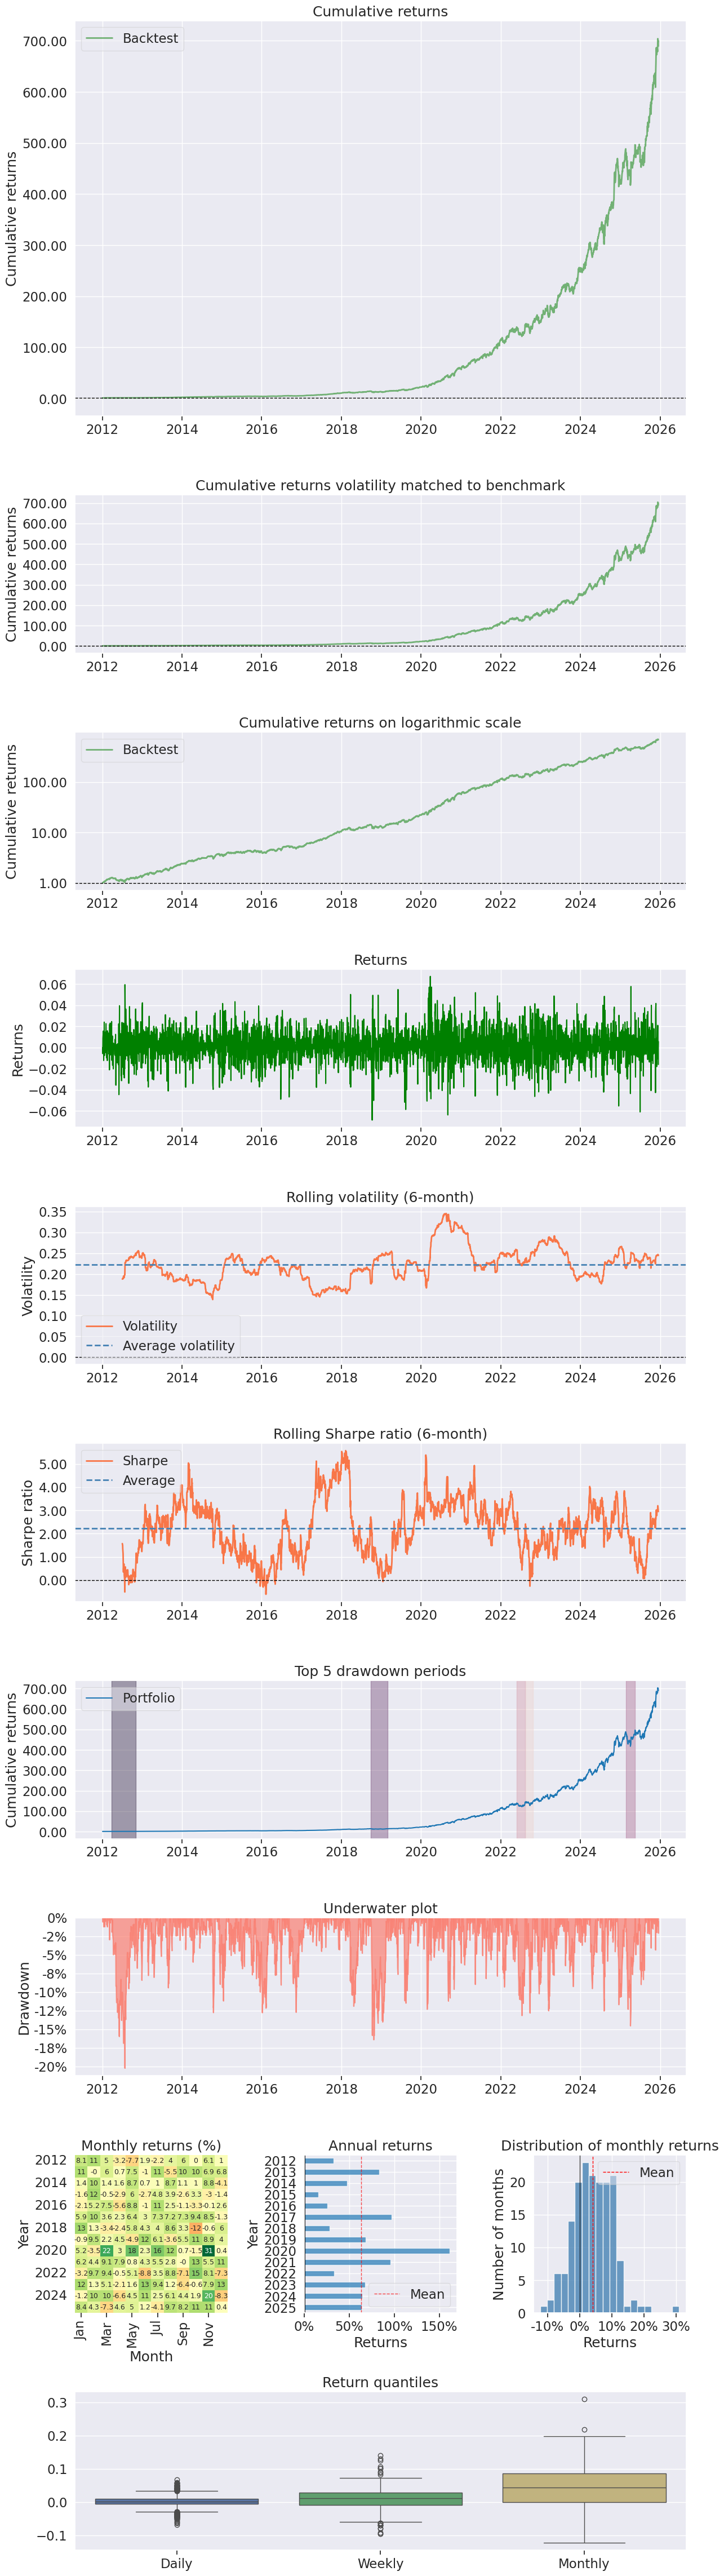

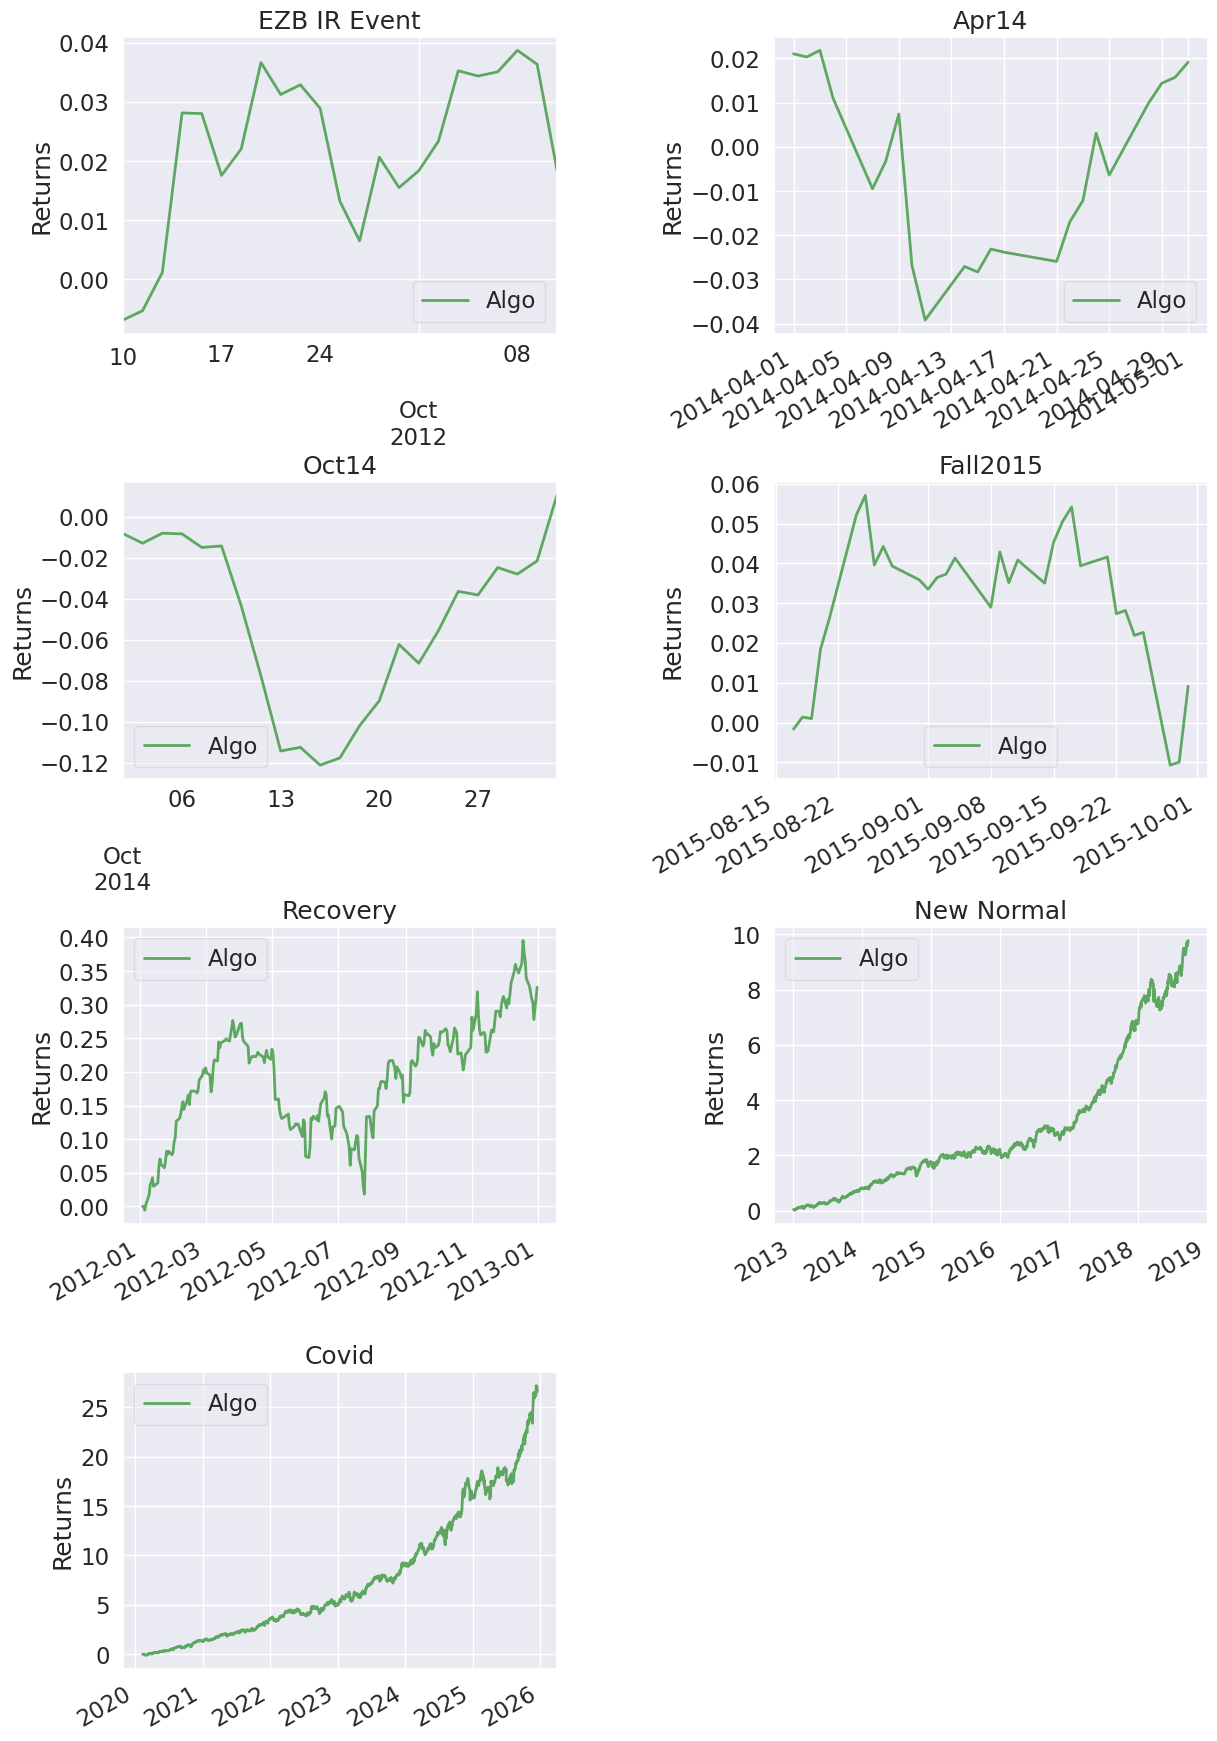

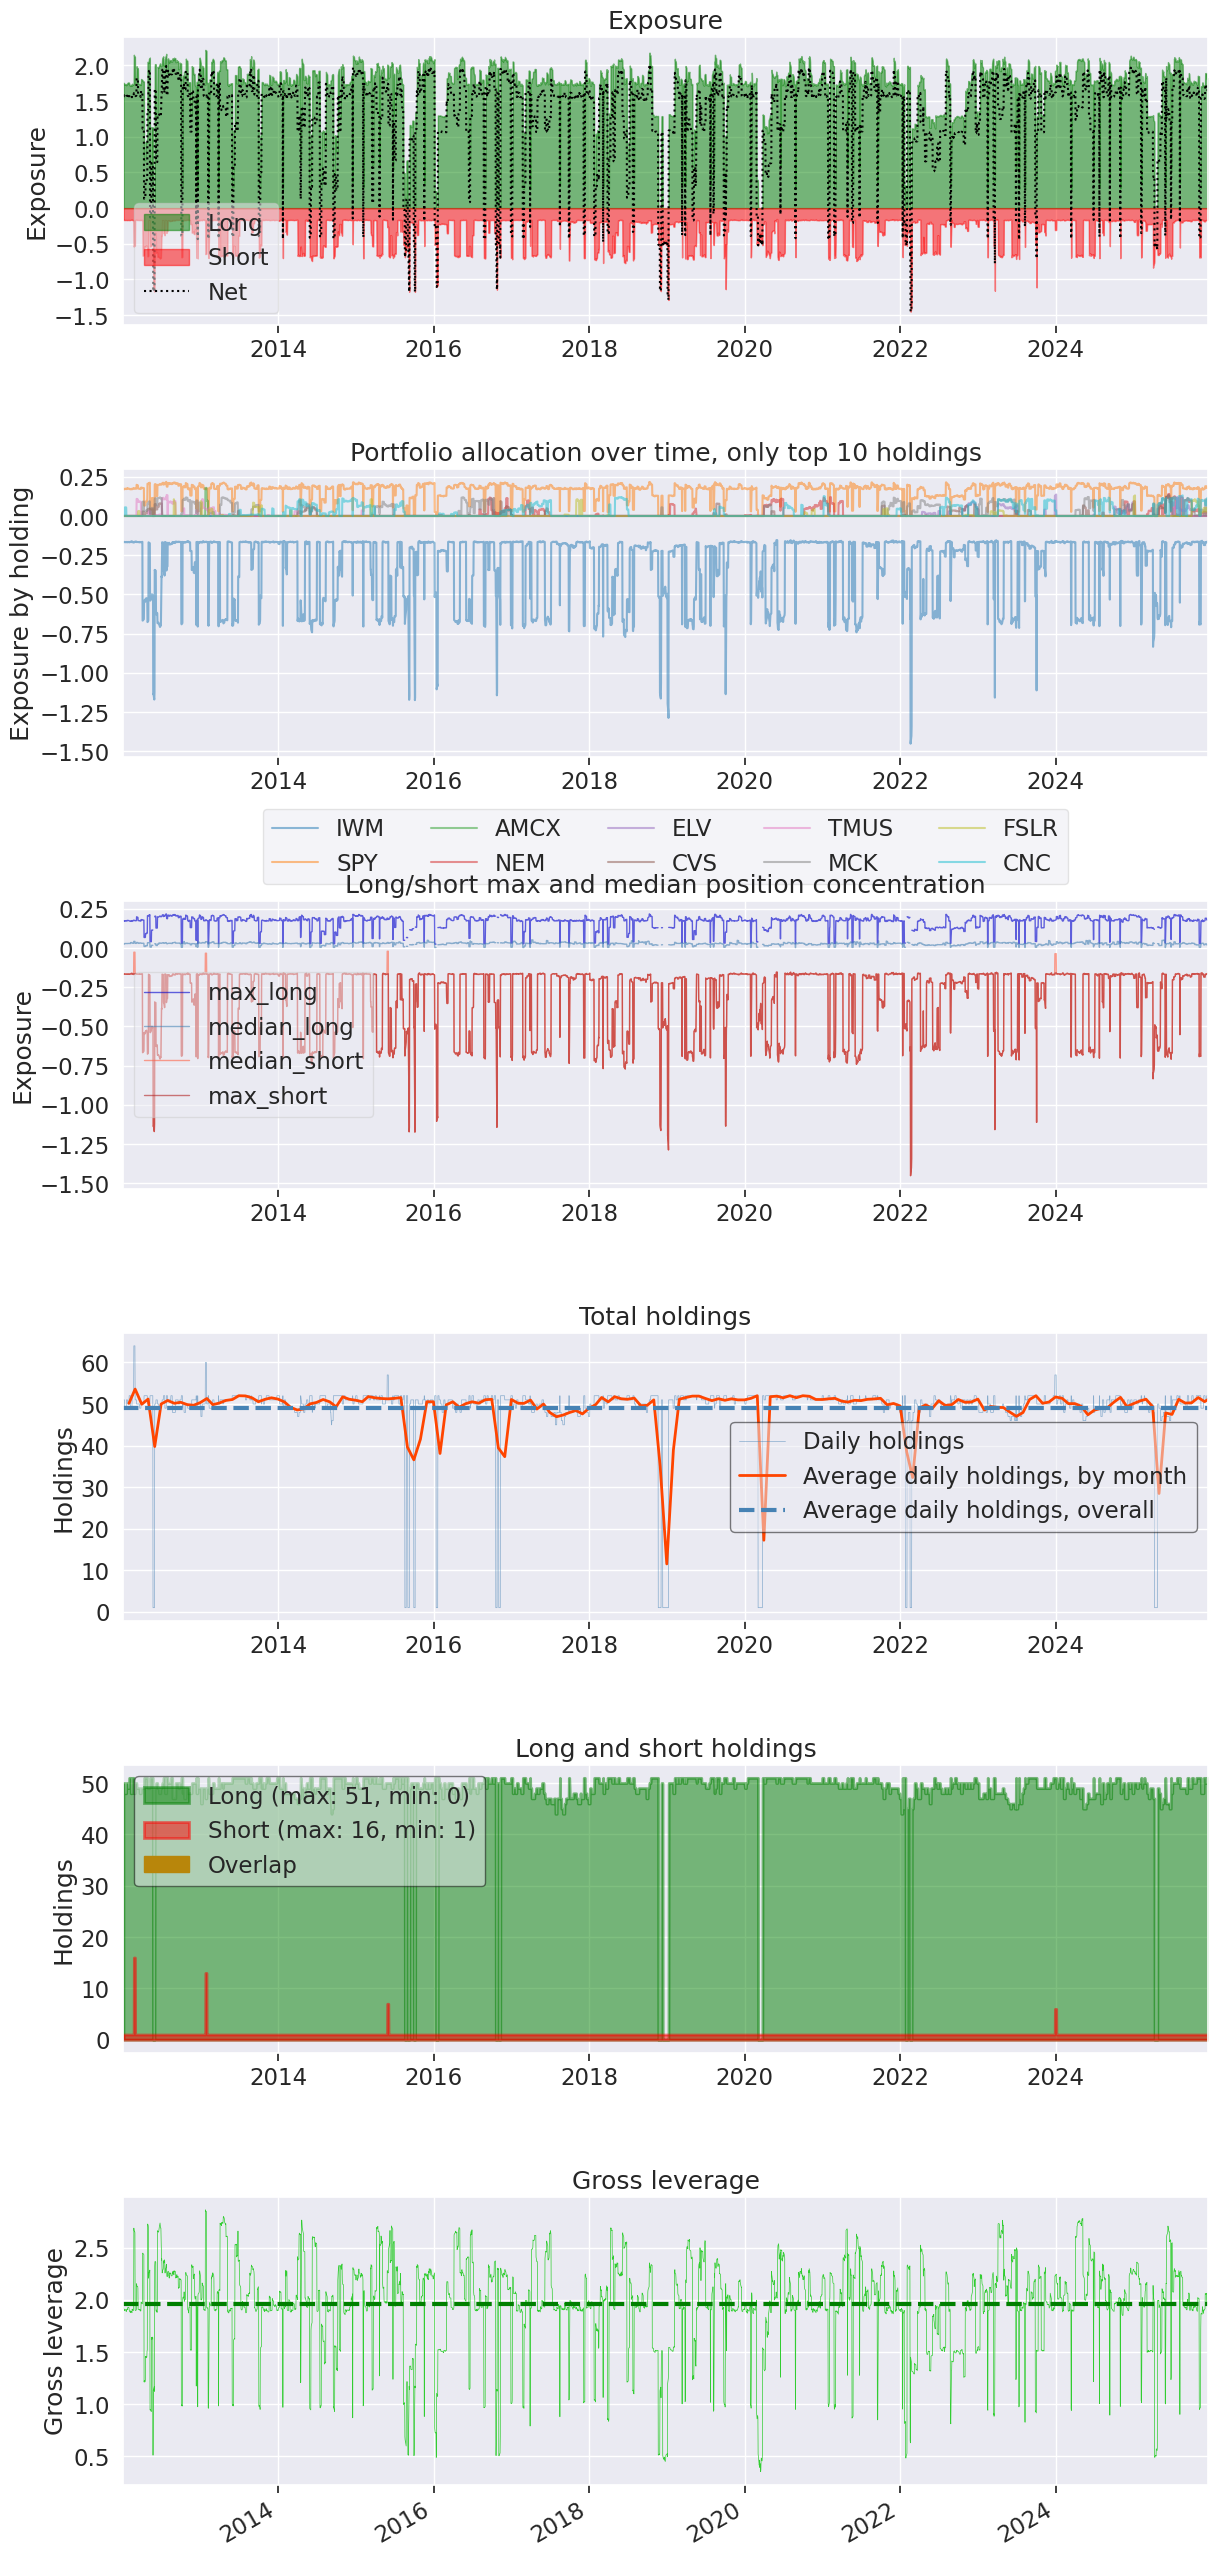

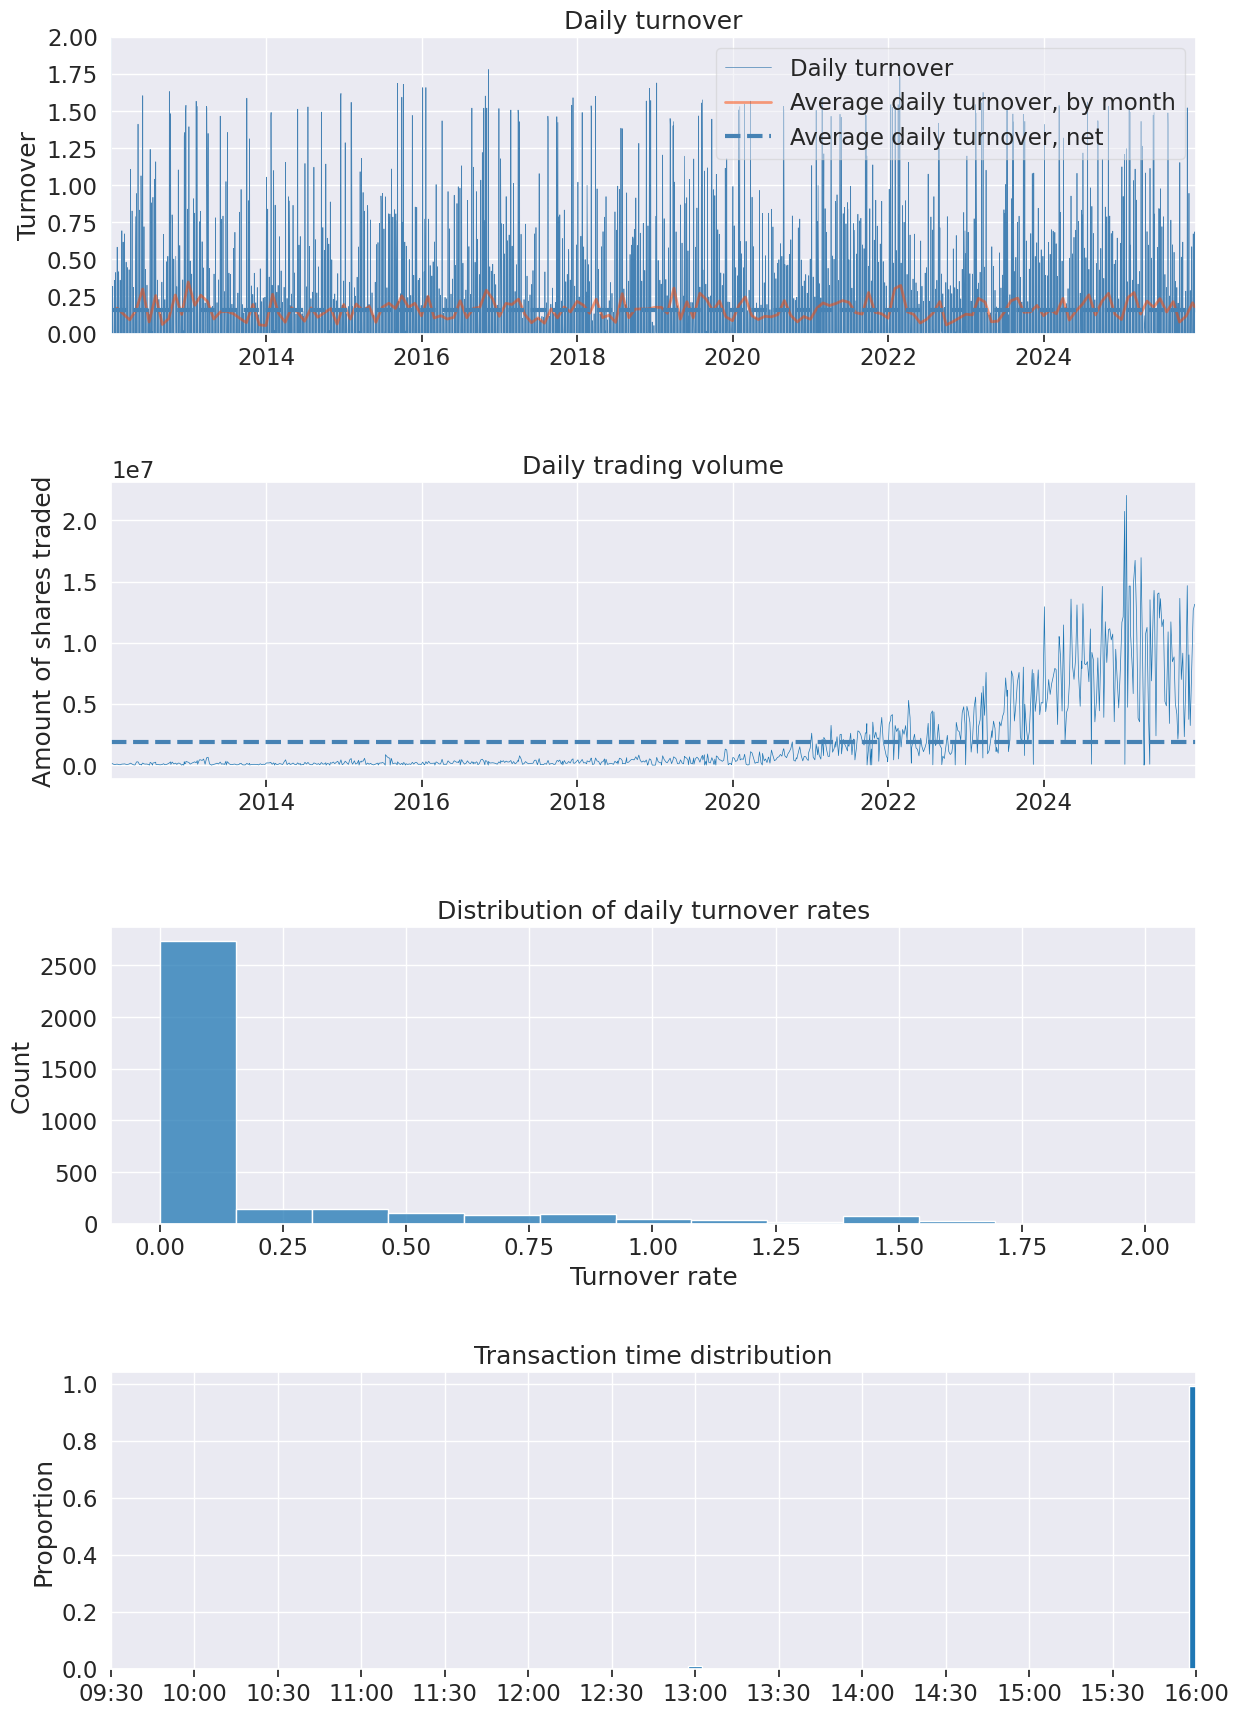

In [49]:
# Create tearsheet
pf.create_full_tear_sheet(
  returns=returns,
  positions=positions,
  transactions=transactions,
  #benchmark_rets=results.benchmark_period_return
)